## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  68.229319  1125.292816  0.911570  5.836774  1.479055
1  54.022983   147.359794  0.249393  8.684866  0.592514
2  56.341388   164.041040  0.145701  8.827389  0.313120
3  29.604004   966.570035  0.505411  9.177117  1.467374
4  71.099428   438.261264  0.192756  6.451438  0.915813


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9478091	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9399609	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9308511	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9234473	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9159810	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9084093	total: 60.1ms	remaining: 9.96s
6:	learn: 0.8999622	total: 60.6ms	remaining: 8.59s
7:	learn: 0.8897490	total: 61.1ms	remaining: 7.57s
8:	learn: 0.8820419	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8750069	total: 62ms	remaining: 6.14s
10:	learn: 0.8671837	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8597868	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8506705	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8427902	total: 64ms	remaining: 4.5s
14:	learn: 0.8350946	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8280327	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8195886	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8127994	total: 65.6ms	remaining: 3.58s
18:	learn: 0.8071248	total: 66ms	remaining: 3.41s

112:	learn: 0.3940940	total: 109ms	remaining: 853ms
113:	learn: 0.3914000	total: 109ms	remaining: 850ms
114:	learn: 0.3892218	total: 110ms	remaining: 844ms
115:	learn: 0.3867496	total: 110ms	remaining: 839ms
116:	learn: 0.3847308	total: 111ms	remaining: 834ms
117:	learn: 0.3820573	total: 111ms	remaining: 830ms
118:	learn: 0.3796508	total: 112ms	remaining: 826ms
119:	learn: 0.3768118	total: 112ms	remaining: 822ms
120:	learn: 0.3744317	total: 112ms	remaining: 817ms
121:	learn: 0.3726276	total: 113ms	remaining: 813ms
122:	learn: 0.3705356	total: 113ms	remaining: 808ms
123:	learn: 0.3682478	total: 114ms	remaining: 805ms
124:	learn: 0.3664216	total: 114ms	remaining: 801ms
125:	learn: 0.3637627	total: 115ms	remaining: 798ms
126:	learn: 0.3619404	total: 116ms	remaining: 794ms
127:	learn: 0.3592654	total: 116ms	remaining: 790ms
128:	learn: 0.3576806	total: 117ms	remaining: 787ms
129:	learn: 0.3559337	total: 117ms	remaining: 783ms
130:	learn: 0.3537707	total: 117ms	remaining: 778ms
131:	learn: 

285:	learn: 0.1847114	total: 186ms	remaining: 464ms
286:	learn: 0.1843252	total: 186ms	remaining: 462ms
287:	learn: 0.1835412	total: 186ms	remaining: 461ms
288:	learn: 0.1830175	total: 187ms	remaining: 460ms
289:	learn: 0.1821387	total: 187ms	remaining: 459ms
290:	learn: 0.1816817	total: 188ms	remaining: 457ms
291:	learn: 0.1812205	total: 188ms	remaining: 456ms
292:	learn: 0.1808933	total: 189ms	remaining: 455ms
293:	learn: 0.1800989	total: 189ms	remaining: 454ms
294:	learn: 0.1796398	total: 190ms	remaining: 453ms
295:	learn: 0.1792882	total: 190ms	remaining: 452ms
296:	learn: 0.1788942	total: 190ms	remaining: 451ms
297:	learn: 0.1776303	total: 191ms	remaining: 449ms
298:	learn: 0.1766447	total: 191ms	remaining: 448ms
299:	learn: 0.1760536	total: 192ms	remaining: 447ms
300:	learn: 0.1757641	total: 192ms	remaining: 446ms
301:	learn: 0.1750480	total: 193ms	remaining: 445ms
302:	learn: 0.1746451	total: 193ms	remaining: 444ms
303:	learn: 0.1735514	total: 193ms	remaining: 443ms
304:	learn: 

521:	learn: 0.0977687	total: 291ms	remaining: 266ms
522:	learn: 0.0972290	total: 292ms	remaining: 266ms
523:	learn: 0.0970174	total: 292ms	remaining: 265ms
524:	learn: 0.0967676	total: 293ms	remaining: 265ms
525:	learn: 0.0964417	total: 293ms	remaining: 264ms
526:	learn: 0.0962398	total: 293ms	remaining: 263ms
527:	learn: 0.0960416	total: 294ms	remaining: 263ms
528:	learn: 0.0956023	total: 294ms	remaining: 262ms
529:	learn: 0.0952921	total: 295ms	remaining: 261ms
530:	learn: 0.0951002	total: 295ms	remaining: 261ms
531:	learn: 0.0949125	total: 296ms	remaining: 260ms
532:	learn: 0.0946421	total: 296ms	remaining: 259ms
533:	learn: 0.0944558	total: 296ms	remaining: 258ms
534:	learn: 0.0941606	total: 297ms	remaining: 258ms
535:	learn: 0.0939875	total: 297ms	remaining: 257ms
536:	learn: 0.0935627	total: 297ms	remaining: 256ms
537:	learn: 0.0933844	total: 298ms	remaining: 256ms
538:	learn: 0.0932170	total: 298ms	remaining: 255ms
539:	learn: 0.0929532	total: 299ms	remaining: 254ms
540:	learn: 

698:	learn: 0.0616322	total: 367ms	remaining: 158ms
699:	learn: 0.0614333	total: 368ms	remaining: 158ms
700:	learn: 0.0611961	total: 369ms	remaining: 157ms
701:	learn: 0.0610714	total: 369ms	remaining: 157ms
702:	learn: 0.0608682	total: 369ms	remaining: 156ms
703:	learn: 0.0606664	total: 370ms	remaining: 155ms
704:	learn: 0.0604715	total: 370ms	remaining: 155ms
705:	learn: 0.0603134	total: 370ms	remaining: 154ms
706:	learn: 0.0601203	total: 371ms	remaining: 154ms
707:	learn: 0.0599426	total: 371ms	remaining: 153ms
708:	learn: 0.0597269	total: 371ms	remaining: 152ms
709:	learn: 0.0595338	total: 372ms	remaining: 152ms
710:	learn: 0.0593801	total: 372ms	remaining: 151ms
711:	learn: 0.0592087	total: 373ms	remaining: 151ms
712:	learn: 0.0591095	total: 373ms	remaining: 150ms
713:	learn: 0.0588903	total: 373ms	remaining: 149ms
714:	learn: 0.0587295	total: 374ms	remaining: 149ms
715:	learn: 0.0585690	total: 374ms	remaining: 148ms
716:	learn: 0.0583811	total: 375ms	remaining: 148ms
717:	learn: 

940:	learn: 0.0345422	total: 473ms	remaining: 29.7ms
941:	learn: 0.0344693	total: 473ms	remaining: 29.1ms
942:	learn: 0.0344501	total: 474ms	remaining: 28.6ms
943:	learn: 0.0344313	total: 474ms	remaining: 28.1ms
944:	learn: 0.0344126	total: 475ms	remaining: 27.6ms
945:	learn: 0.0343440	total: 475ms	remaining: 27.1ms
946:	learn: 0.0343256	total: 476ms	remaining: 26.6ms
947:	learn: 0.0343075	total: 476ms	remaining: 26.1ms
948:	learn: 0.0342368	total: 476ms	remaining: 25.6ms
949:	learn: 0.0342189	total: 477ms	remaining: 25.1ms
950:	learn: 0.0342013	total: 477ms	remaining: 24.6ms
951:	learn: 0.0341838	total: 478ms	remaining: 24.1ms
952:	learn: 0.0341174	total: 478ms	remaining: 23.6ms
953:	learn: 0.0341002	total: 478ms	remaining: 23.1ms
954:	learn: 0.0340832	total: 479ms	remaining: 22.6ms
955:	learn: 0.0340148	total: 479ms	remaining: 22ms
956:	learn: 0.0339527	total: 479ms	remaining: 21.5ms
957:	learn: 0.0339359	total: 480ms	remaining: 21ms
958:	learn: 0.0338746	total: 480ms	remaining: 20.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

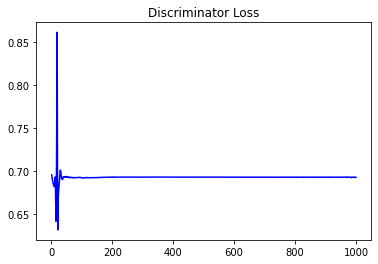

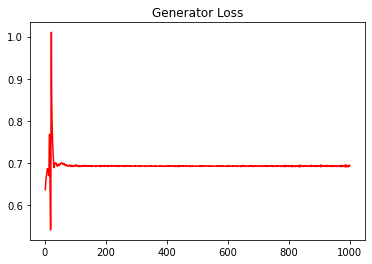

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29188692157011537


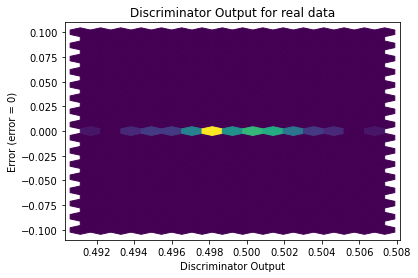

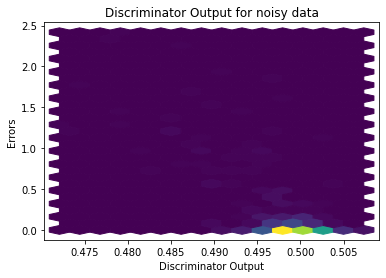

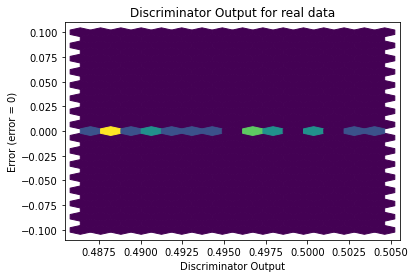

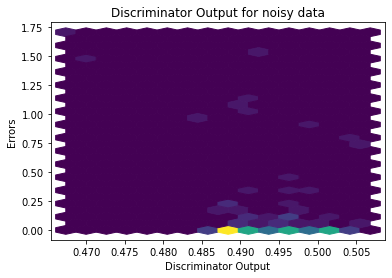

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


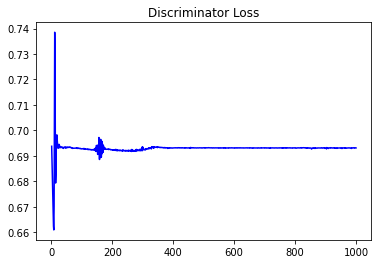

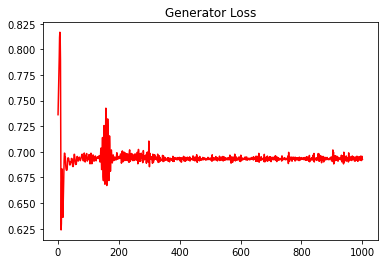

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2792973071984377


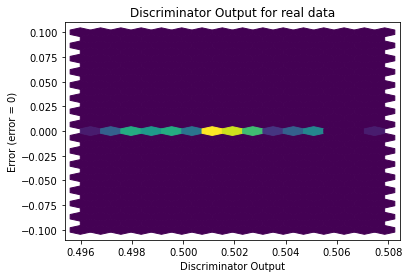

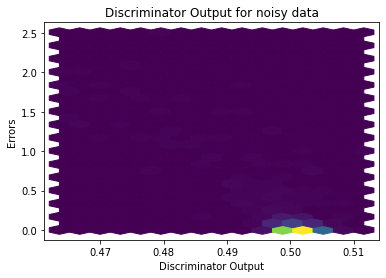

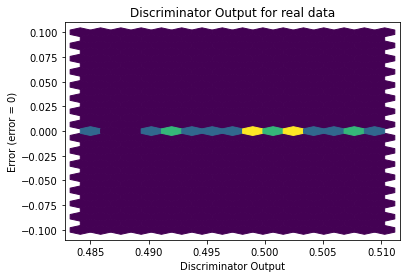

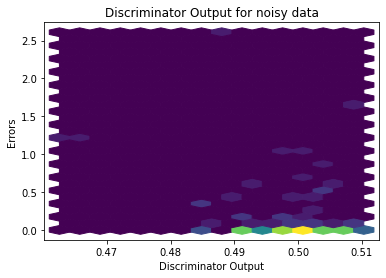

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0964]], requires_grad=True)
